# ChIP-seq analysis

This notebook shows how to analyze the TF-co-occurrences of predefined TFBS e.g. from ChIP-seq peaks. The data used here is obtained from the ENCODE project (https://pubmed.ncbi.nlm.nih.gov/29126249/) and consists of all TF ChIP-seq experiments for the celltype GM12878, and subset to chr4 in the human genome. 

## Setup a CombObj

First, we load the tfcomb package and set up an empty CombObj:

In [1]:
from tfcomb import CombObj
C = CombObj()

In [2]:
C

<CombObj>

## Read TFBS from .bed-file

Next, we are going to fill the CombObj 'C' with binding sites from GM12878 ChIP-seq experiments:

In [3]:
C.TFBS_from_bed("../data/GM12878_hg38_chr4_TF_chipseq.bed")

INFO: Reading sites from '../data/GM12878_hg38_chr4_TF_chipseq.bed'...
INFO: Processing sites
INFO: Read 112109 sites (151 unique names)


Now, the CombObj contains the .TFBS variable holding all TFBS to use for analysis:

In [4]:
C.TFBS[:10]

[chr4	11875	11876	ZBTB33	1000	.,
 chr4	116639	116640	JUNB	974	.,
 chr4	116678	116679	RUNX3	1000	.,
 chr4	121620	121621	RUNX3	1000	.,
 chr4	124050	124051	ZNF217	948	.,
 chr4	124052	124053	SMARCA5	802	.,
 chr4	124169	124170	NR2F1	634	.,
 chr4	124289	124290	CBX5	906	.,
 chr4	124363	124364	E4F1	1000	.,
 chr4	124365	124366	PKNOX1	1000	.]

The CombObj will now reflect that TFBS were added:

In [5]:
C

<CombObj: 112109 TFBS (151 unique names)>

## Perform market basket analysis

Next, the function .market_basket() is used to perform the co-occurrence analysis of the sites just added to .TFBS:

In [6]:
C.market_basket()

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Running with multiprocessing threads == 1. To change this, give 'threads' in the parameter of the function.
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


As is shown in the info messages, this also runs the .count_within() function of 'C' (if no counts were found yet). If you want to set specific parameters for count_within, you can split these calculations such as seen here:
```
C.count_within(max_distance=200)
C.market_basket()
```

In any case, running .market_basket() will fill out the .rules variable of the CombObj:

In [7]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
CTCF-RAD21,CTCF,RAD21,1751,2432,2241,0.750038,18.643056
RAD21-CTCF,RAD21,CTCF,1751,2241,2432,0.750038,18.643056
RAD21-SMC3,RAD21,SMC3,1376,2241,1638,0.718192,20.314026
SMC3-RAD21,SMC3,RAD21,1376,1638,2241,0.718192,20.314026
CTCF-SMC3,CTCF,SMC3,1361,2432,1638,0.681898,20.245177


Printing the CombObj again will also tell you how many rules were found in the market basket analysis:

In [8]:
C

<CombObj: 112109 TFBS (151 unique names) | Market basket analysis: 21284 rules>

## Visualize results

The CombObj 'C' contains a number of different visualizations for the identified TF-TF co-occurrence pairs. The default  measure plotted is 'cosine', but many of the options of the plots can be changed as seen in the examples below:

### Heatmap

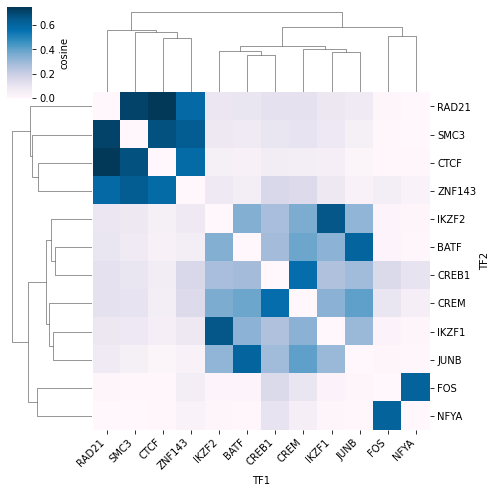

In [9]:
_ = C.plot_heatmap()

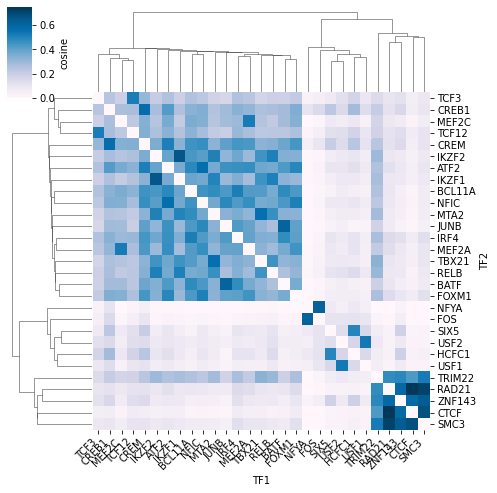

In [10]:
#Showing more rules
_ = C.plot_heatmap(n_rules=50)

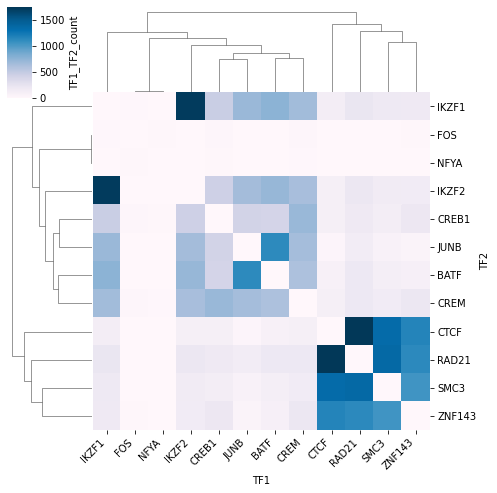

In [11]:
#Coloring the heatmap by TF1_TF2_count
_ = C.plot_heatmap(color_by="TF1_TF2_count")

### Bubble plot

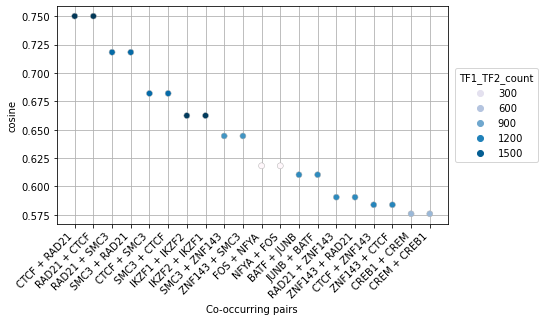

In [12]:
_ = C.plot_bubble()

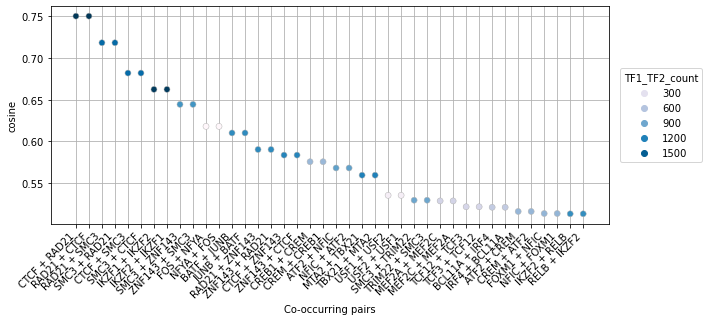

In [13]:
#Show more rules
_ = C.plot_bubble(n_rules=40, figsize=(10,4))

## Handling duplicate rules

As seen in the bubble plot above, the rules are duplicated due to the cosine measure, which scores TF1-TF2 the same way as TF2-TF1. In order to simplify the results, you can use .simplify_rules() to remove the duplicates from the .rules:

In [14]:
C.simplify_rules()

In [15]:
C.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
CTCF-RAD21,CTCF,RAD21,1751,2432,2241,0.750038,18.643056
RAD21-SMC3,RAD21,SMC3,1376,2241,1638,0.718192,20.314026
CTCF-SMC3,CTCF,SMC3,1361,2432,1638,0.681898,20.245177
IKZF1-IKZF2,IKZF1,IKZF2,1726,2922,2324,0.662343,11.215960
SMC3-ZNF143,SMC3,ZNF143,1060,1638,1652,0.644383,21.838431
...,...,...,...,...,...,...,...
HDAC6-JUNB,HDAC6,JUNB,1,172,1866,0.001765,-6.905016
RELB-SUZ12,RELB,SUZ12,1,2011,172,0.001700,-6.793962
ATF7-SUZ12,ATF7,SUZ12,1,2061,172,0.001680,-6.119294
RAD21-SUZ12,RAD21,SUZ12,1,2241,172,0.001611,-7.500216


Now, you can again use plot_bubble() to visualize the highest-scoring co-occurring pairs:

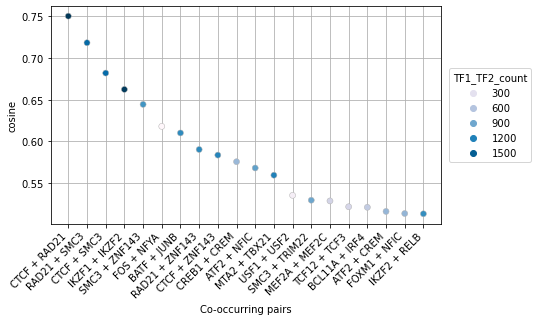

In [16]:
_ = C.plot_bubble()

## Save CombObj to a pickle object

We can now save the CombObj to a pickle object to be used in other analysis:

In [17]:
C.to_pickle("../data/GM12878.pkl")